# The Reactions of the German Stock Market to COVID-19 and Containment Policies: A Vector Autoregressive Analysis

## 6. Descriptive Statistics full sample

In [1]:
# Importing the necessary python packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
%matplotlib inline
plt.style.use(['science','no-latex'])

In [2]:
# Load in the previosuly prepared dataset
df = pd.read_csv("prepared_data.csv", parse_dates=["date"])

# Drop unnecessary columns and dummy columns for this sheet
df = df.loc[:,:"stringency_index"].drop(columns=["hdax_open","total_cases"])

#saving sample dates in variables
sample_1_start = pd.to_datetime("2020-03-03")
sample_1_1_end = pd.to_datetime("2020-05-30")
sample_1_end = pd.to_datetime("2020-09-30")
sample_2_start = pd.to_datetime("2020-10-01")
sample_2_end = pd.to_datetime("2021-06-30")

In [3]:
# Generate descriptive statistics
pd.options.display.float_format = "{:.2f}".format
df = df[(df["date"]<=sample_2_end) & (df["date"]>=sample_1_start)]
df.describe()
# df.loc[:,"hdax_close":"stringency_index"].drop(columns=["total_cases"]).describe()
# df.loc[:,"hdax_close":"stringency_index"].drop(columns=["total_cases"]).describe()

,hdax_close,new_cases,stringency_index
count,336.00,336.00,336.00
mean,7245.44,8662.63,66.59
std,912.62,9931.07,12.33
min,4658.54,16.00,25.00
25%,6814.13,1154.75,59.72
50%,7231.09,4500.50,67.59
75%,7858.30,13239.75,76.85
max,8694.16,49044.00,85.19


## 7. Data Plotting and Sample Selection

In [4]:
# Loading the column names in a list
columns = list(df.drop(columns=["date"]).columns)

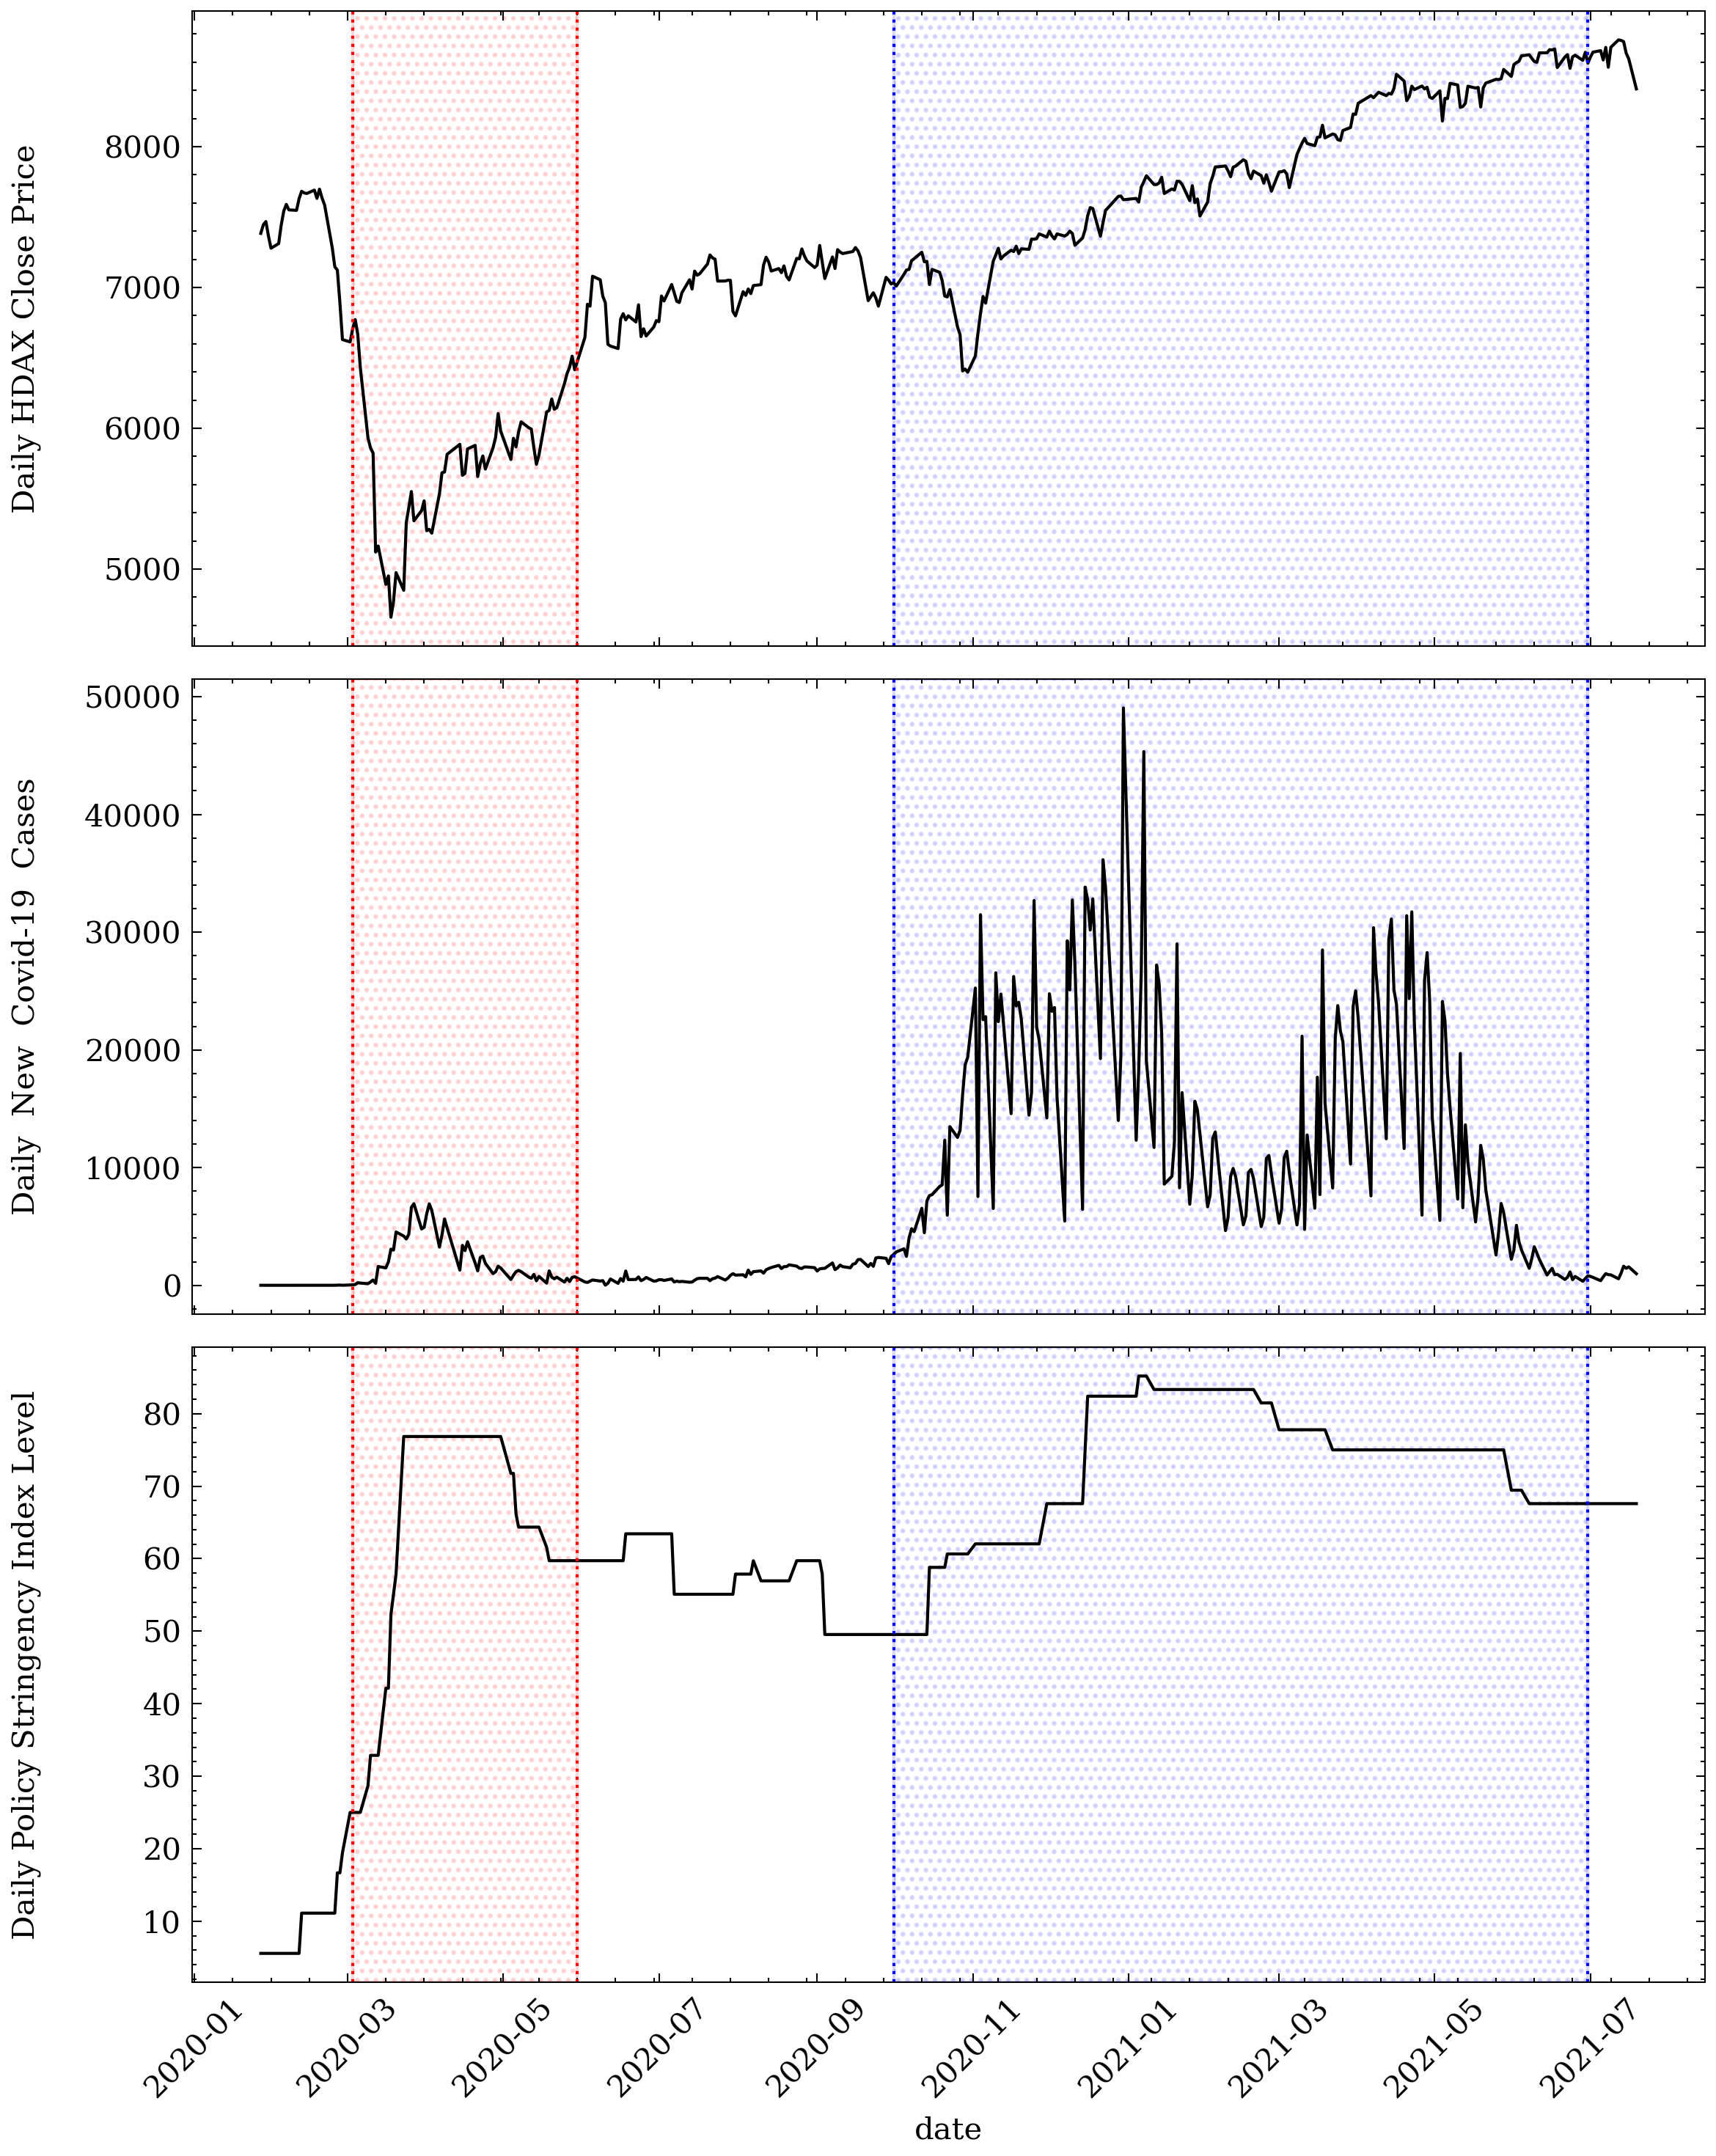

In [36]:
#plotting the different datapoints and highlighting the two sample areas

fig, axes = plt.subplots(3, 1, tight_layout = True, figsize=(8,10), sharex=True, dpi=300)

#plotting and highlighting samples
for column, ax in zip(columns, axes.reshape(-1)):
    sns.lineplot(x=df.date, y=column, data=df, ax=ax, color="black")
    ax.yaxis.set_label_coords(-0.1,0.5)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    # highlight the first wave sample
    ax.axvline(x = sample_1_start, color = 'red', ls=":")
    ax.axvline(x = sample_1_1_end, color = 'red', ls=":")
    ax.axvspan(sample_1_start, sample_1_1_end, alpha=0.15, color='red', hatch="....", fill=False)
    
    # highlight the second wave sample
    ax.axvline(x = sample_2_start, color = 'blue', ls=":")
    ax.axvline(x = sample_2_end, color = 'blue', ls=":")
    ax.axvspan(sample_2_start, sample_2_end, alpha=0.15, color='blue', hatch="....", fill=False)

axes[0].set_ylabel("Daily HDAX Close Price")
axes[1].set_ylabel("Daily  New  Covid-19  Cases")
axes[2].set_ylabel("Daily Policy Stringency Index Level");
fig.savefig('all_charts_marked.pdf', format='pdf')

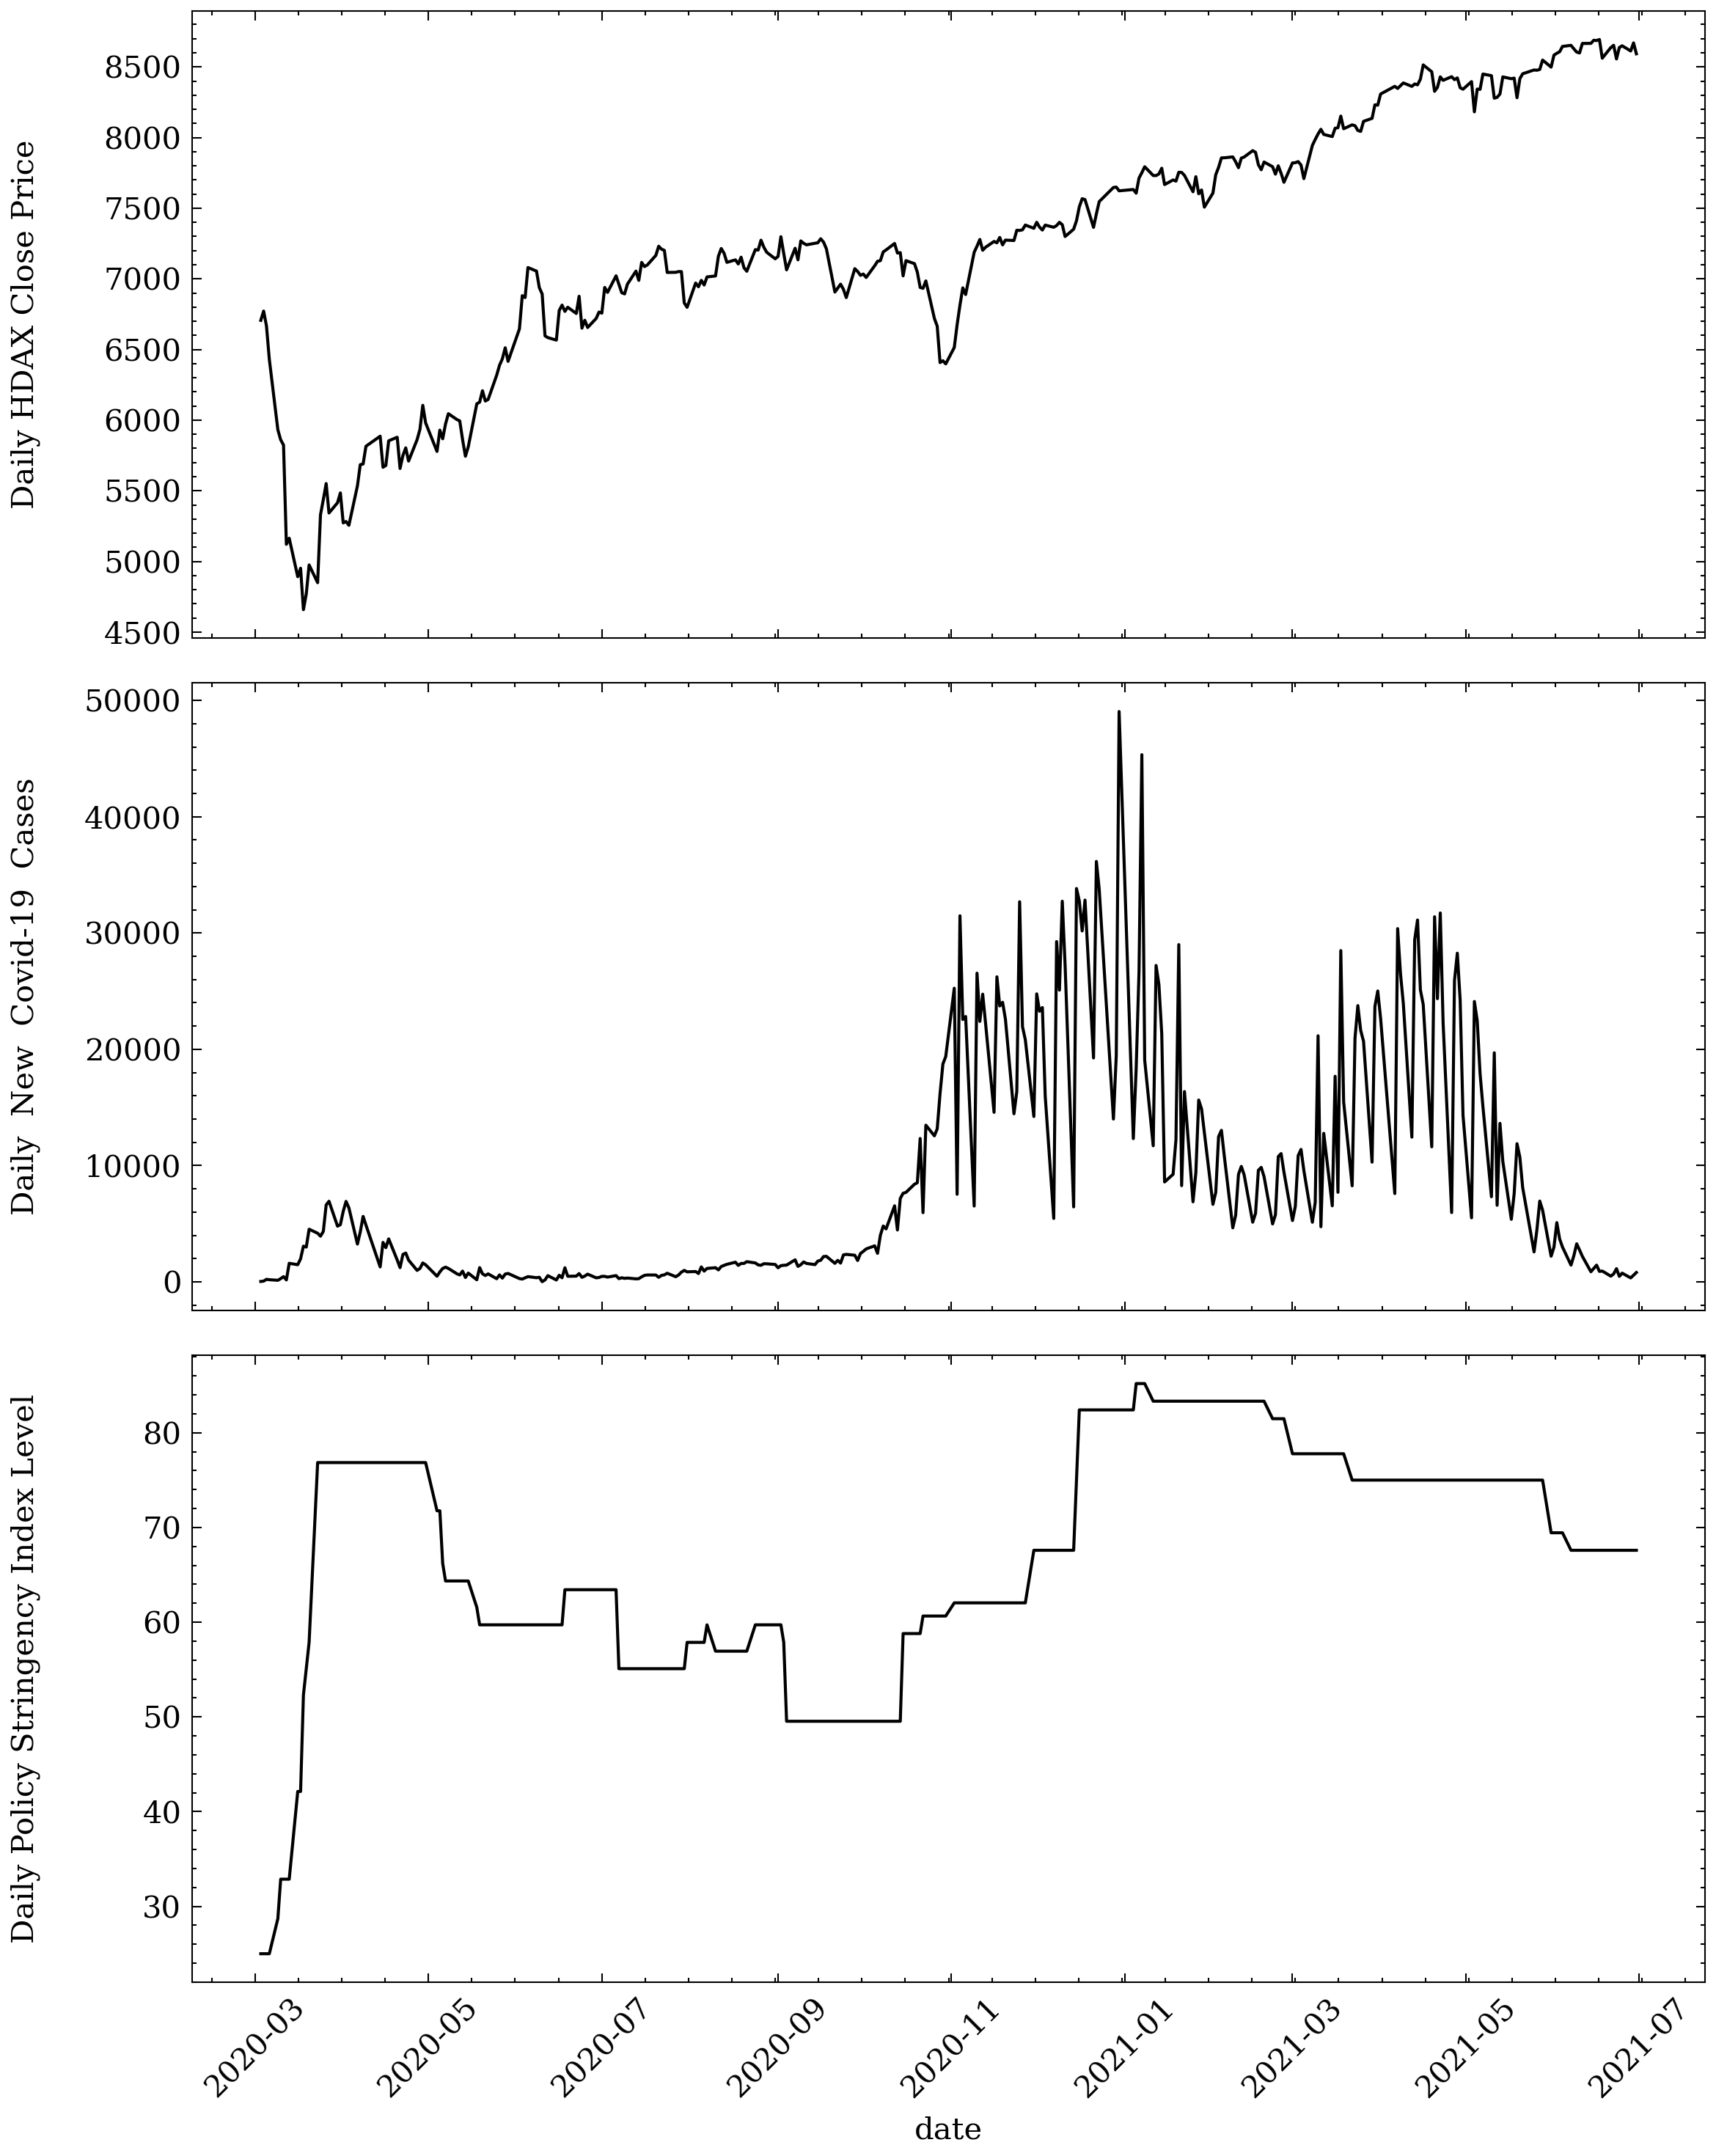

In [6]:
#plotting the relevant datapoints without higlighting the sub-samples
fig, axes = plt.subplots(3, 1, tight_layout = True, figsize=(8,10), sharex=True, dpi=300)

#plotting
for column, ax in zip(columns, axes.reshape(-1)):
    sns.lineplot(x=df.date, y=column, data=df, ax=ax, color="black")
    ax.yaxis.set_label_coords(-0.1,0.5)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

axes[0].set_ylabel("Daily HDAX Close Price")
axes[1].set_ylabel("Daily  New  Covid-19  Cases")
axes[2].set_ylabel("Daily Policy Stringency Index Level")
fig.savefig('all_charts.pdf', format='pdf')

## 8. Descriptive Statistics with two sub-samples

In [30]:
#generate descriptive statistics of first wave sub-sample
df = pd.read_csv("prepared_data.csv", parse_dates=["date"])
df_1 = df[(df["date"]<=sample_1_end) & (df["date"]>=sample_1_start)].copy(deep=True)
df_1.loc[:,"hdax_close":"stringency_index"].describe()

,hdax_close,total_cases,new_cases,stringency_index
count,148.000000,148.000000,148.000000,148.000000
mean,6500.855676,174496.763514,1485.493243,59.270878
std,698.583005,75709.145345,1481.581599,11.773485
min,4658.540000,196.000000,16.000000,25.000000
25%,5884.527500,157818.250000,480.750000,55.090000
50%,6787.435000,190058.000000,1156.000000,59.720000
75%,7057.255000,218766.000000,1721.250000,63.660000
max,7298.420000,292913.000000,6933.000000,76.850000


In [31]:
#generate descriptive statistics of first_1 wave sub-sample
df_1_1 = df[(df["date"]<=sample_1_1_end) & (df["date"]>=sample_1_start)].copy(deep=True)
df_1_1.loc[:,"hdax_close":"stringency_index"].describe()

,hdax_close,total_cases,new_cases,stringency_index
count,61.000000,61.000000,61.000000,61.000000
mean,5774.646885,107517.393443,2146.081967,63.014426
std,483.025131,69802.310872,2010.065872,16.888147
min,4658.540000,196.000000,37.000000,25.000000
25%,5484.820000,32986.000000,600.000000,59.720000
50%,5823.930000,137698.000000,1268.000000,64.350000
75%,6045.760000,170588.000000,3394.000000,76.850000
max,6772.210000,182922.000000,6933.000000,76.850000


In [32]:
#generate descriptive statistics of second wave sub-sample
df_2 = df[(df["date"]<=sample_2_end) & (df["date"]>=sample_2_start)].copy(deep=True)
df_2.loc[:,"hdax_close":"stringency_index"].describe()

,hdax_close,total_cases,new_cases,stringency_index
count,188.000000,1.880000e+02,188.000000,188.000000
mean,7831.600000,2.219263e+06,14312.718085,72.345319
std,569.413059,1.137482e+06,10104.206534,9.361710
min,6398.200000,2.955390e+05,341.000000,49.540000
25%,7366.112500,1.189383e+06,6117.000000,67.590000
50%,7803.205000,2.349821e+06,12057.000000,75.000000
75%,8363.977500,3.285816e+06,22614.500000,81.480000
max,8694.160000,3.736205e+06,49044.000000,85.190000


The descriptive statistics clearly show that the first and second waves are very different!

## 9. Saving both samples seperately for further statistical analysis

In [33]:
# Saving first wave sample
df_1.set_index("date", inplace=True, drop=True)
df_1.to_csv("prepared_data_sample_1.csv")

# Saving first_1 wave sample
df_1_1.set_index("date", inplace=True, drop=True)
df_1_1.to_csv("prepared_data_sample_1_1.csv")

# Saving second wave sample
df_2.set_index("date", inplace=True, drop=True)
df_2.to_csv("prepared_data_sample_2.csv")

# Saving full sample timeframe
df_3 = df[(df["date"]<=sample_2_end) & (df["date"]>=sample_1_start)].copy(deep=True)
df_3.to_csv("prepared_data_sample_full.csv")